In [1]:
import itertools
import numpy as np
import pyrenn as prn
import sklearn.datasets as skd
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [2]:
space = 1.6

In [3]:
x,y = skd.make_classification(n_samples=3200, n_features=4, n_redundant=0, random_state=6, class_sep=.4)
x,y = skd.make_blobs(n_samples=3200, centers=2, n_features=4, random_state=6, center_box=(-space, space))

In [4]:
x_train, x_test_, y_train, y_test_ = train_test_split(x, y, test_size=0.32, random_state=42)

## needs to be divisible by two for expectation layer
x_train, y_train = x_train[0:2048], y_train[0:2048]
x_test, x_val = x_test_[:int(len(x_test_)/2)], x_test_[int(len(x_test_)/2):]
y_test, y_val = y_test_[:int(len(y_test_)/2)], y_test_[int(len(y_test_)/2):]

In [5]:
def one_hot(labels, n_class = 2):
    """ One-hot encoding """
    expansion = np.eye(n_class)
    y = expansion[:, labels-1]
    assert y.shape[0] == n_class, "Wrong number of labels!"
    return y

In [6]:
def error_rate(predictions, labels,NUM_LABELS=2):
    """Return the error rate and confusions."""
    correct = np.sum(predictions == labels)
    total = np.asarray(predictions).shape[0]

    error = 100.0 - (100 * float(correct) / float(total))

    confusions = np.zeros([NUM_LABELS, NUM_LABELS], np.int32)
    bundled = zip(predictions, labels)
    for predicted, actual in bundled:
        confusions[int(predicted), int(actual)] += 1
    return error, confusions

In [7]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    

In [8]:
net = prn.CreateNN([4,12,2])

In [9]:
# batch_size = 50
number_of_batches= 1
k_iter = 100
error_stop = 1e-15
norms = []

r = 0
Data = x_train
# for i in range(4):
#     n_ = 1/np.max(Train_Input[:,i])
#     norms.append(n_)
# print(norms)

# Train_Input = np.zeros(Data.shape)
# for i in range(2*batch_size):
#     Train_Input[i,:] = np.multiply(Data[i,:],norms)
Train_Input = Data

y_Input = y_train
y_Input_coded = one_hot(y_Input.astype(int))

# for i in range(number_of_batches):
#     r = np.random.randint(0,Data_Class1.shape[0]-batch_size)
#     r = 0
#     Train_Class0 = Data_Class0[r:r+batch_size,:]
#     Train_Class1 = Data_Class1[r:r+batch_size,:]
#     Data = np.concatenate((Train_Class0,Train_Class1),axis=0)

#     Train_Input = Data[:,3:48]
#     Train_Input = normalize(Train_Input[:,:], axis=1, norm='max')
#     y_Input = Data[:,-1]
#     y_Input_coded = one_hot(y_Input.astype(int))

net_LM = prn.train_LM(np.transpose(Train_Input.astype('float32')),y_Input_coded,net,verbose=True,k_max=k_iter,E_stop=error_stop)
#     print('Batch No. ',i,' of ',number_of_batches)

Iteration:  0 		Error:  2408.5980304800014 	scale factor:  3.0
Iteration:  1 		Error:  585.1643639909705 	scale factor:  0.3
Iteration:  2 		Error:  257.14710501216405 	scale factor:  0.3
Iteration:  3 		Error:  214.18980532205177 	scale factor:  0.3
Iteration:  4 		Error:  192.3398568542382 	scale factor:  0.3
Iteration:  5 		Error:  189.2844589863075 	scale factor:  0.3
Iteration:  6 		Error:  187.72523377857993 	scale factor:  0.3
Iteration:  7 		Error:  187.36650618024493 	scale factor:  0.03
Iteration:  8 		Error:  184.49318556059143 	scale factor:  0.03
Iteration:  9 		Error:  183.92779806981508 	scale factor:  0.03
Iteration:  10 		Error:  183.56388714828194 	scale factor:  0.03
Iteration:  11 		Error:  183.4294151795497 	scale factor:  0.03
Iteration:  12 		Error:  183.35393029209408 	scale factor:  0.03
Iteration:  13 		Error:  183.31324015442954 	scale factor:  0.03
Iteration:  14 		Error:  183.27988329666235 	scale factor:  0.03
Iteration:  15 		Error:  183.24702020186731 	s

In [10]:
# Prediction of Validation set
y = prn.NNOut(np.transpose(x_val),net_LM)

In [11]:
pred_ = []
for m in range(y_val.shape[0]):
    #print(np.abs(np.argmax(y[:,m])-1))
    pred_.append(np.abs(np.argmax(y[:,m])-1))

Confusion matrix, without normalization
[[251  16]
 [ 15 230]]
Normalized confusion matrix
[[0.94 0.06]
 [0.06 0.94]]


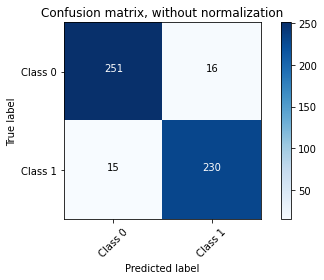

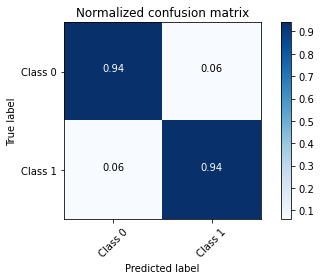

Test error: 6.1%
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       267
           1       0.93      0.94      0.94       245

    accuracy                           0.94       512
   macro avg       0.94      0.94      0.94       512
weighted avg       0.94      0.94      0.94       512



In [12]:
real_ = y_val
class_names = ["Class 0" , "Class 1"]
cnf_matrix = confusion_matrix(real_, pred_)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
test_error, confusions = error_rate(pred_,real_)
print('Test error: %.1f%%' % test_error)
print(classification_report(real_, pred_))